# Bài toán so sánh độ giống nhau của hai hình ảnh

In [1]:
# Lậy shape của tấm hình nhỏ nhất-> crop theo đó để có ảnh cùng kích thước.
#Homework
#+ Build 1 function, input: shape nhiều anh, 1 anh khác output: là tấm hình có  

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import sys
import glob
import cv2

In [3]:
def rgb2gray(rgb):
    r,b,g = rgb[:,:,0],rgb[:,:,1],rgb[:,:,2]
    gray= (r+b+g)/3
    return gray

In [4]:
def rgb2gray_(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [5]:
def convert_img(image):
    data = np.asarray( image, dtype="int32" )
    return data

In [6]:
def mse(imageA,imageB):
    error = np.sum((np.absolute(convert_img(imageA)-convert_img(imageB))**2))
    error /=  float(imageA.shape[0]*imageA.shape[1])
    return error

In [7]:
def compare_images(imageA, imageB):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    #s = ssim(imageA, imageB)

    # setup the figure
    fig = plt.figure(figsize=(16,8))
    plt.suptitle("MSE: %.2f" % (m))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

    # show the images
    plt.show()

In [8]:
# Hàm bị lỗi
def crop_center_1(img,new_width,new_height):
    width = img.shape[0]
    height = img.shape[1]
    
    left = int(np.ceil((width - new_width) / 2))
    
    right = width - int(np.floor((width - new_width) / 2))
    
    top = int(np.ceil((height - new_height) / 2))
    
    bottom = height - int(np.floor((height - new_height) / 2))
    
    center_cropped_img = img[top:bottom, left:right]
    
    return center_cropped_img

In [9]:
# Hàm dùng được
def crop_center(img,cropx,cropy):
    x,y,_ = img.shape
    startx = x//2 -cropx//2
    starty = y//2 -cropy//2
    return img[startx:startx+cropx, starty:starty+ cropy, :]

In [10]:
image_list =[cv2.imread(file) for file in glob.glob('image/*.*')]
a = (np.array(image_list))

In [11]:
# Get shape of images
H = []
W = []
for i in range(13):
    print(a[i].shape)
    H.append(a[i].shape[0])
    W.append(a[i].shape[1])
print('Min width',min(H))
print('Min hight',min(W))

(480, 360, 3)
(480, 360, 3)
(268, 400, 3)
(268, 400, 3)
(640, 640, 3)
(267, 400, 3)
(300, 400, 3)
(300, 400, 3)
(480, 270, 3)
(300, 400, 3)
(300, 400, 3)
(300, 400, 3)
(300, 400, 3)
Min width 267
Min hight 270


In [12]:
# Crop image
a = min(H)
b = min(W)
after_crop = []
length = len(image_list)
for i in range(length):
    after_crop.append(crop_center(image_list[i],a,b))

In [13]:
# After crop
for i in range(13):
    img = after_crop[i]
    print(img.shape)
    #imgplot = plt.imshow(img)
    #plt.show()

(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)
(267, 270, 3)


0


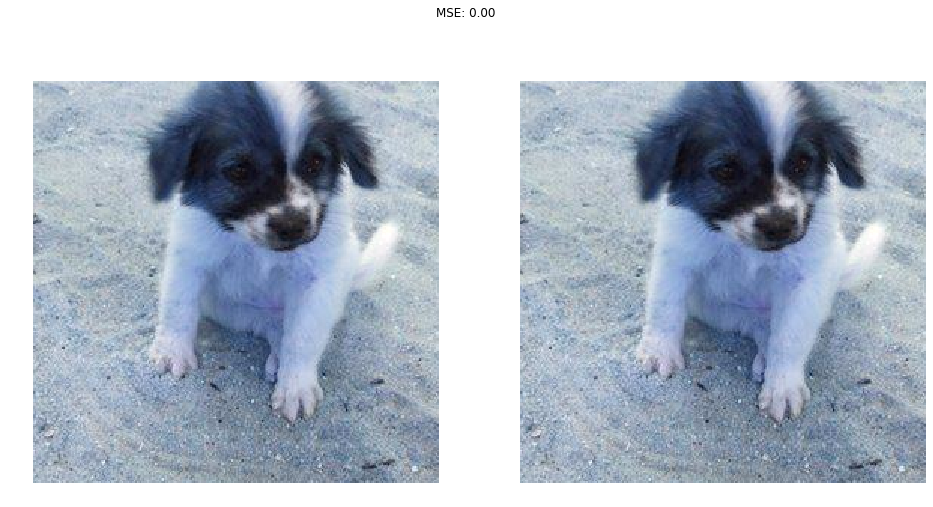

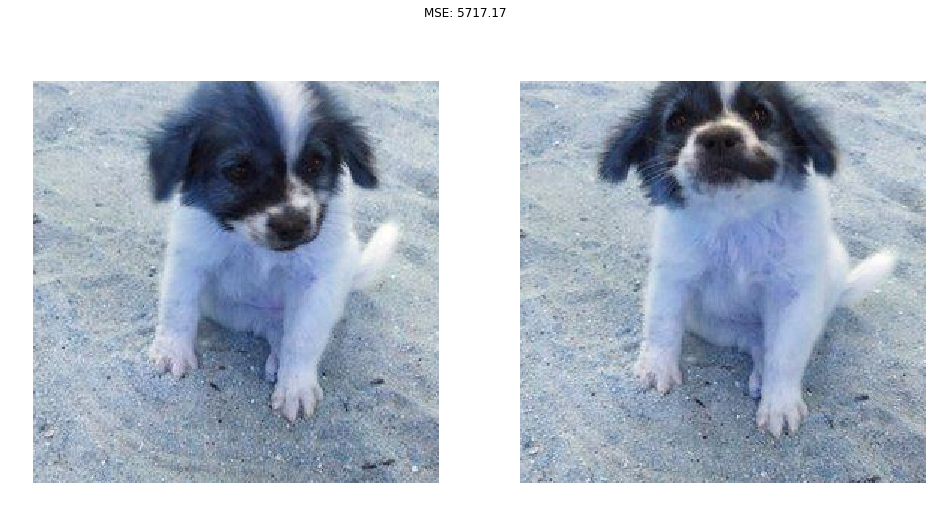

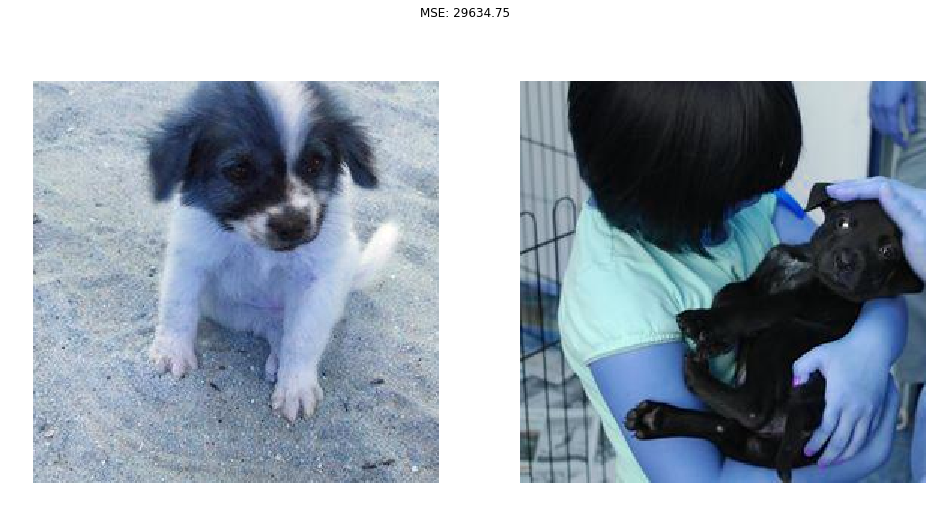

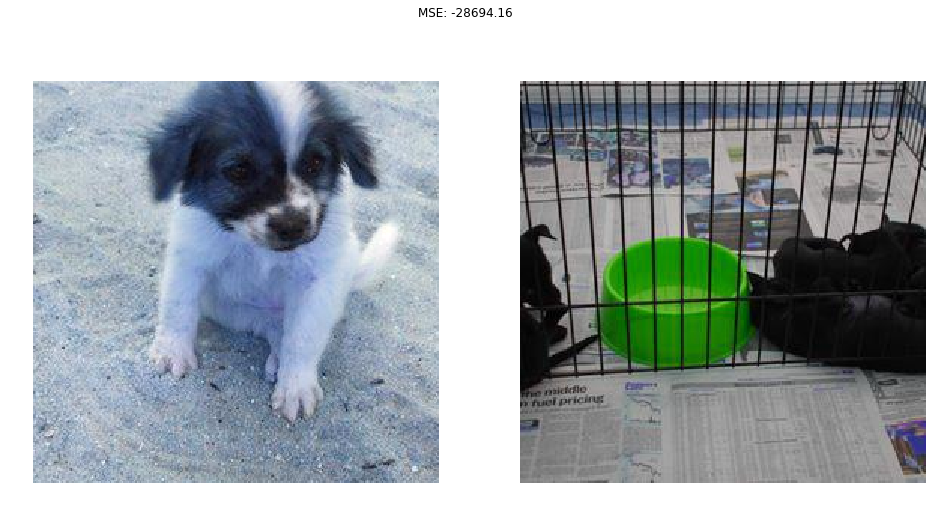

1


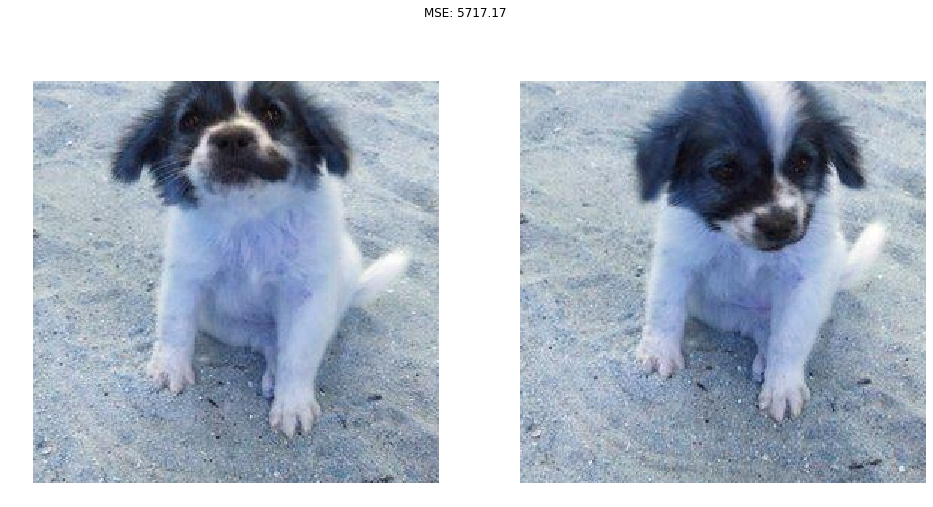

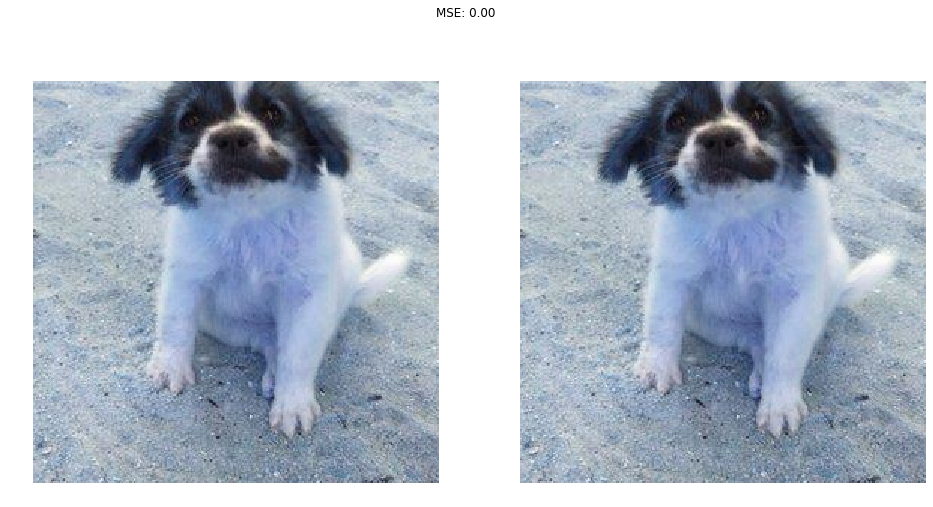

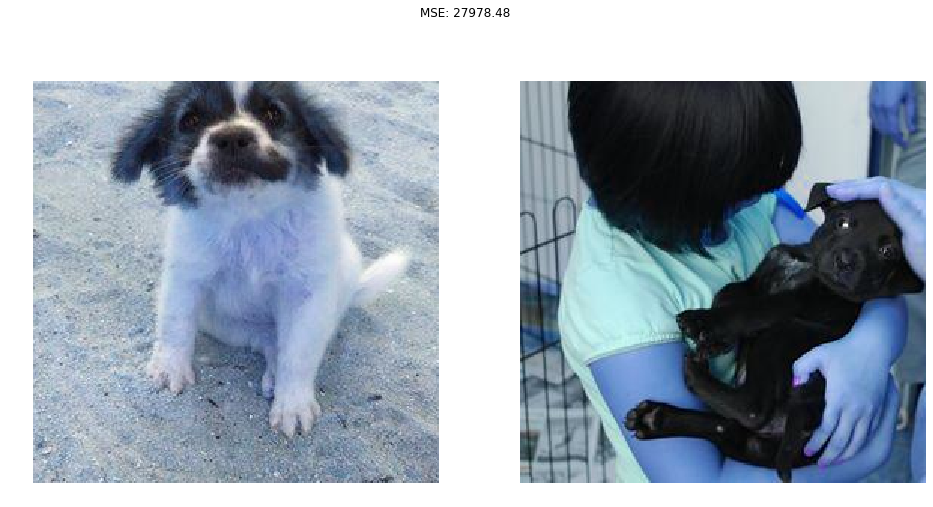

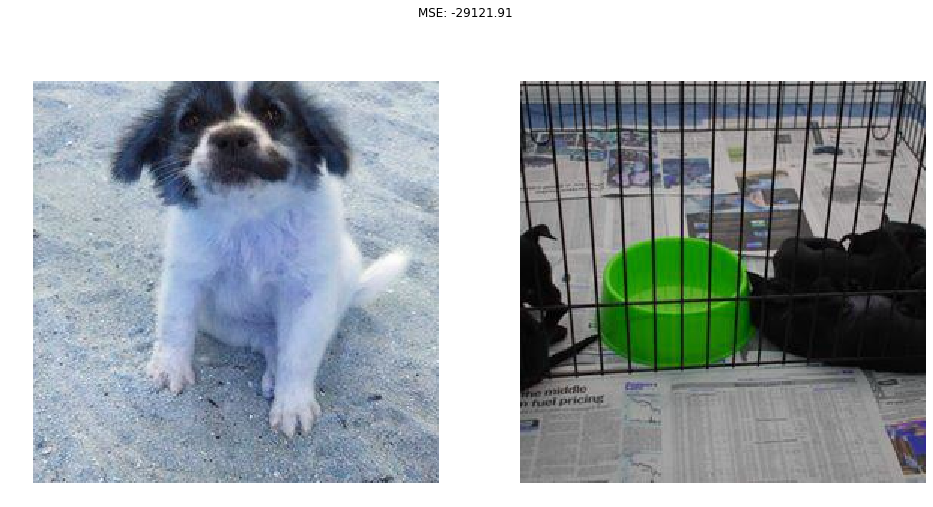

2


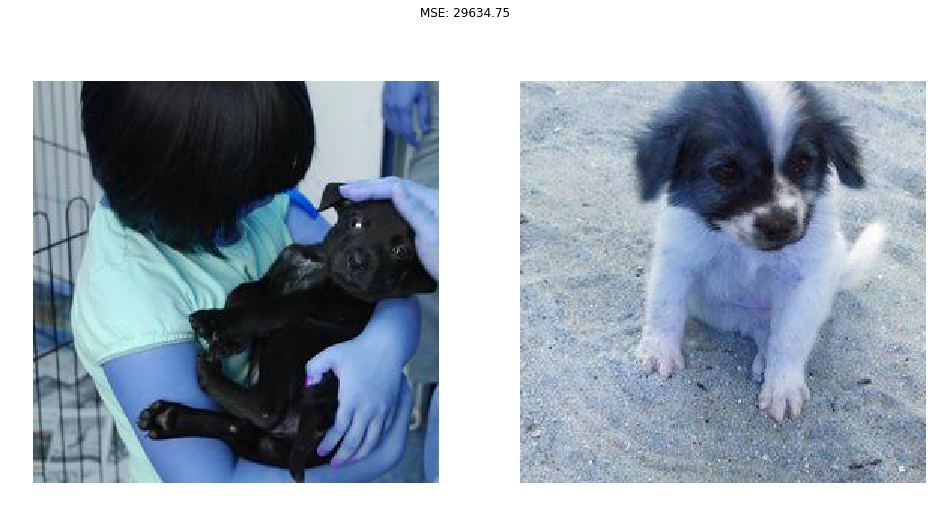

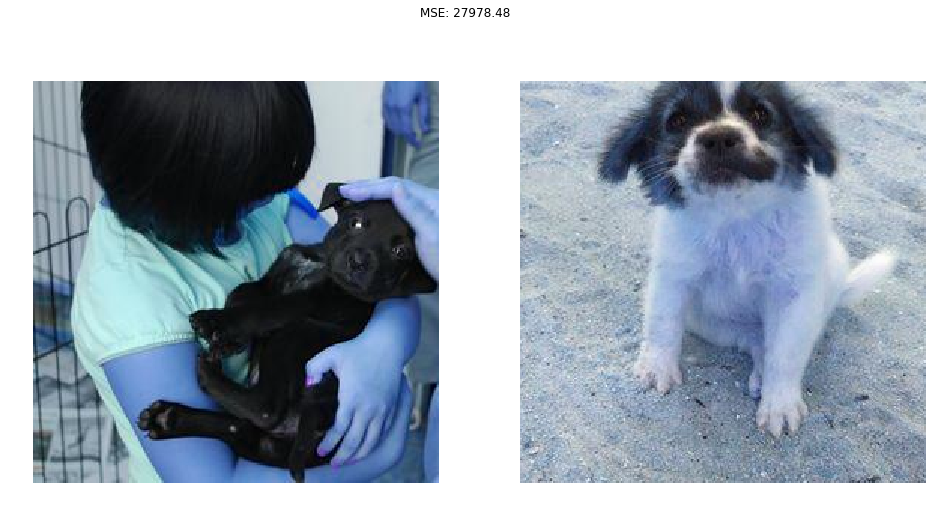

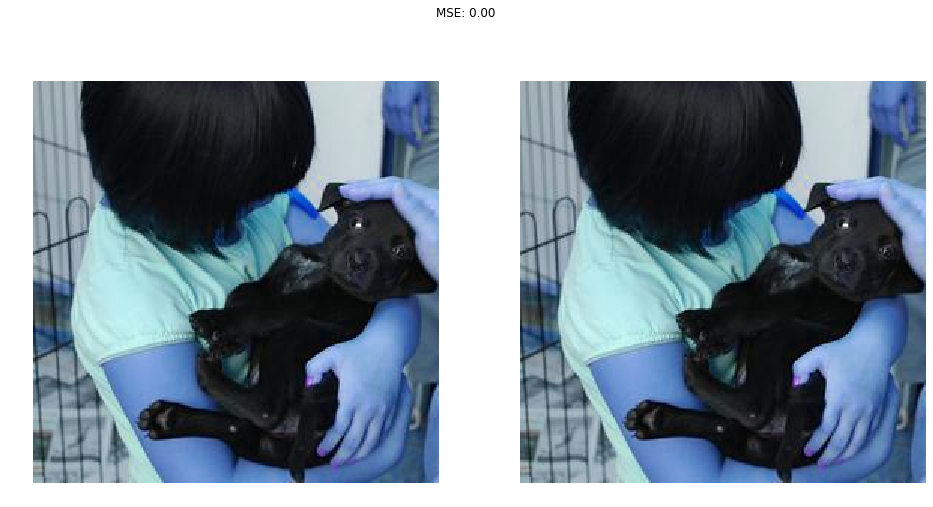

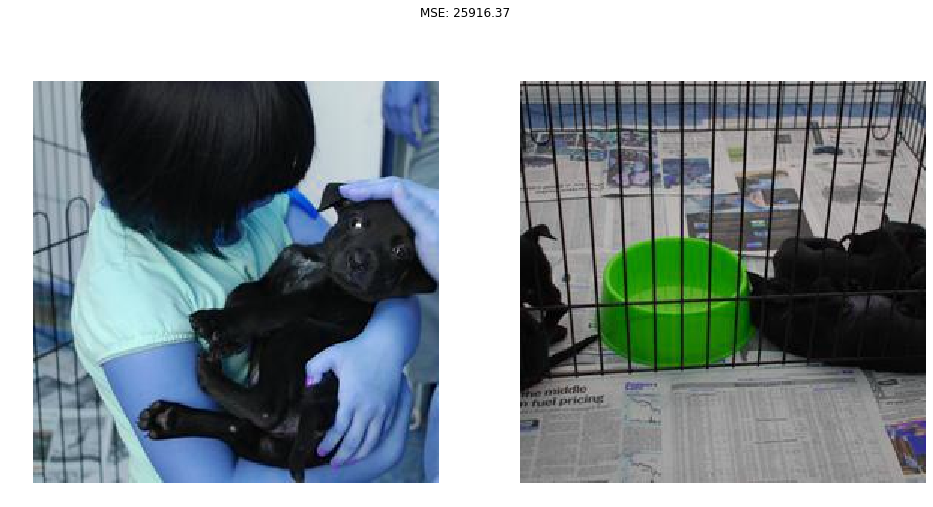

3


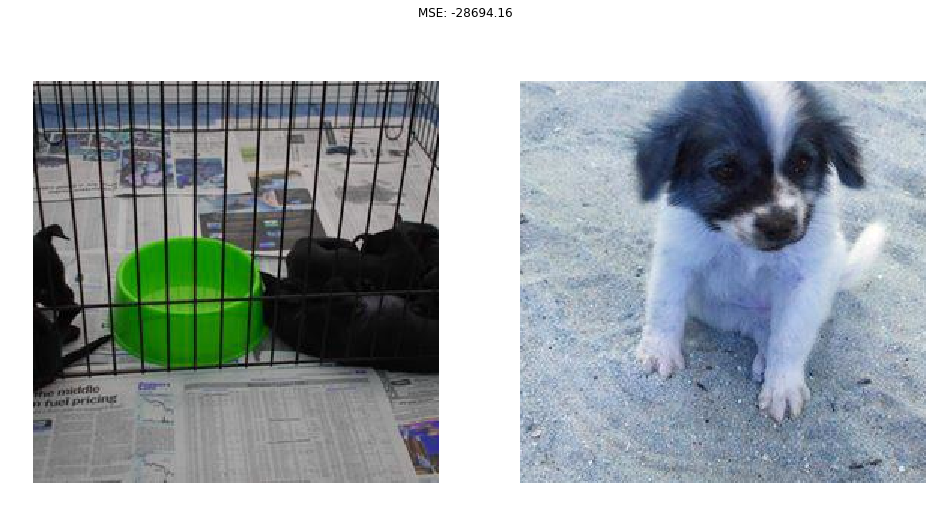

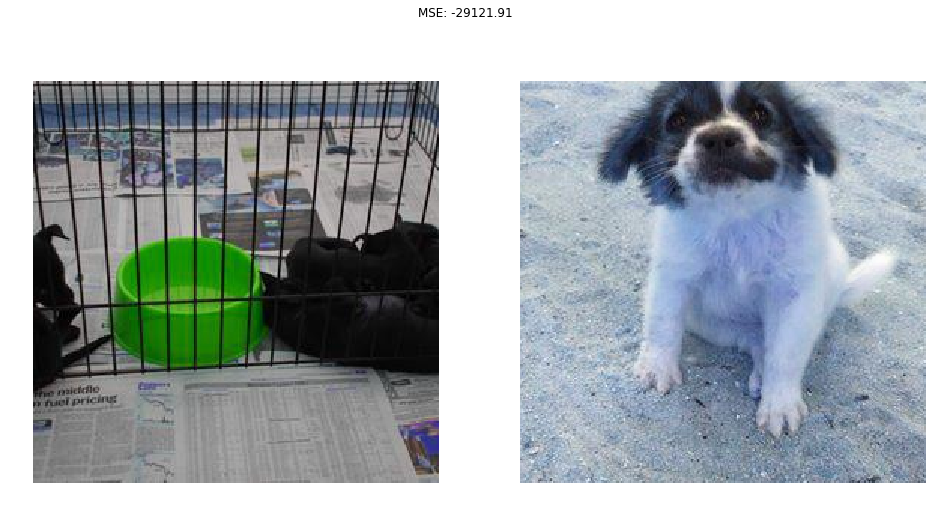

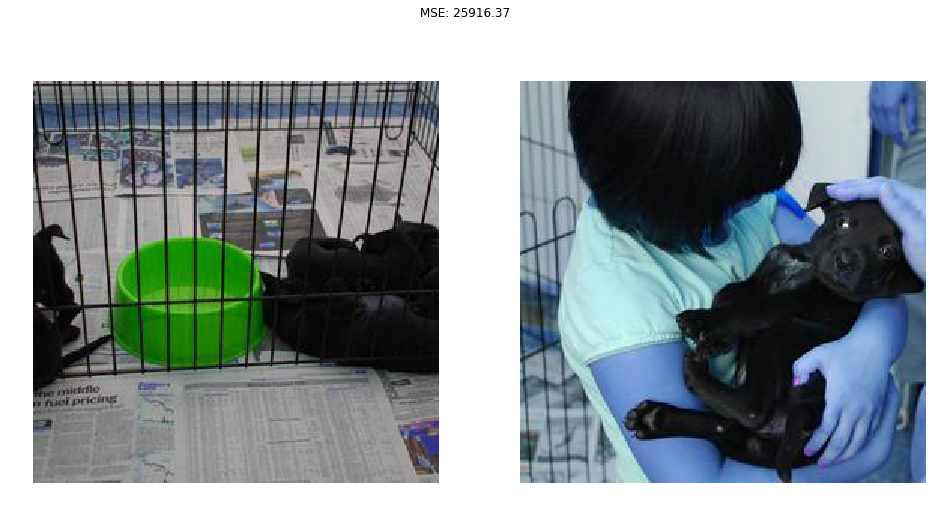

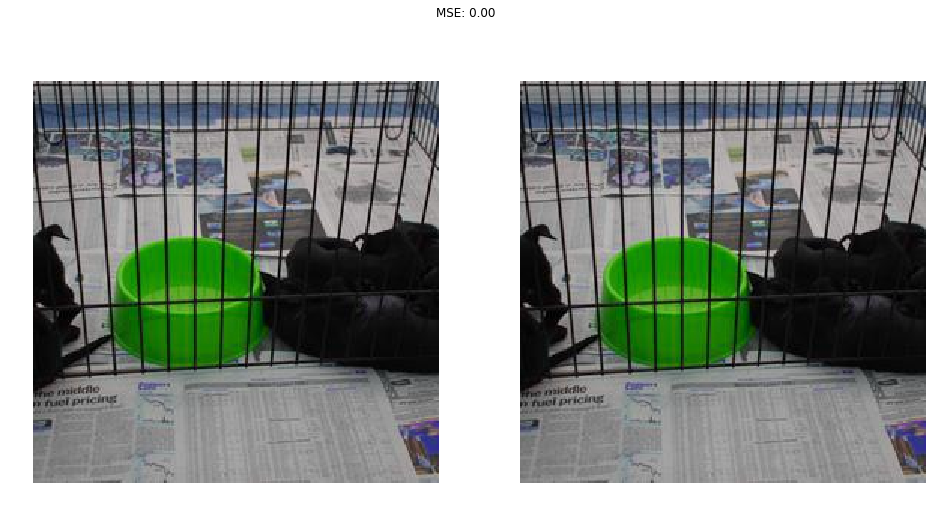

In [14]:
list_mse =[]
for i in range(4):
    print(i)
    j = i+1
    for j in range(4):
        num_mse = mse(after_crop[i],after_crop[j])
        compare_images(after_crop[i],after_crop[j])
        list_mse.append(num_mse)
        